[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median value of owner-occupied homes')]

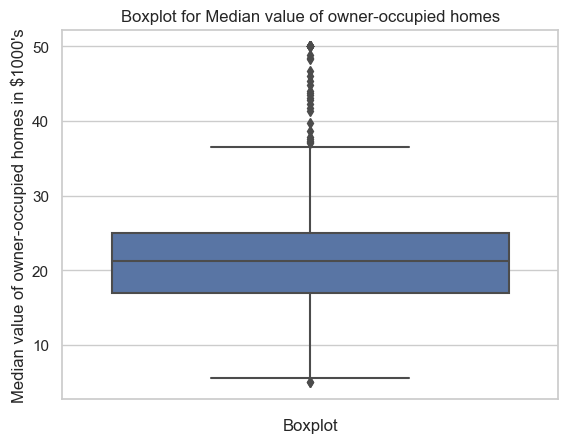

In [1]:
import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
sns.set(style="whitegrid")
ax=sns.boxplot(y='MEDV',data=(boston_df))
ax.set(ylabel = "Median value of owner-occupied homes in $1000's"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median value of owner-occupied homes")


[Text(0.5, 0, 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)'),
 Text(0, 0.5, 'Frequency for Charles river variable'),
 Text(0.5, 1.0, 'Histogram for the Charles river variable')]

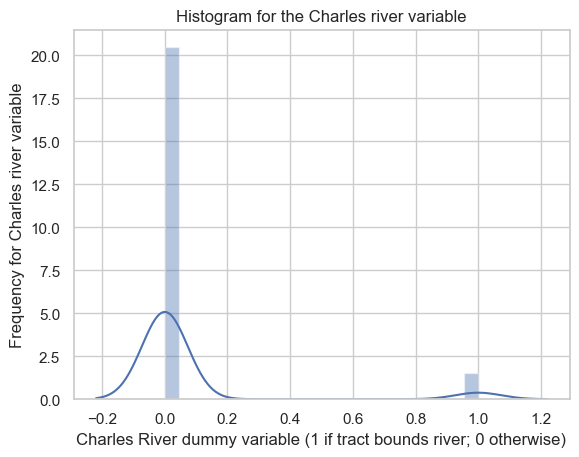

In [2]:
distplot = sns.distplot(boston_df['CHAS'])
distplot.set(xlabel = "Charles River dummy variable (1 if tract bounds river; 0 otherwise)"
             ,ylabel = "Frequency for Charles river variable"
            , title = "Histogram for the Charles river variable")

[Text(0.5, 0, ' Proportion of owner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable.')]

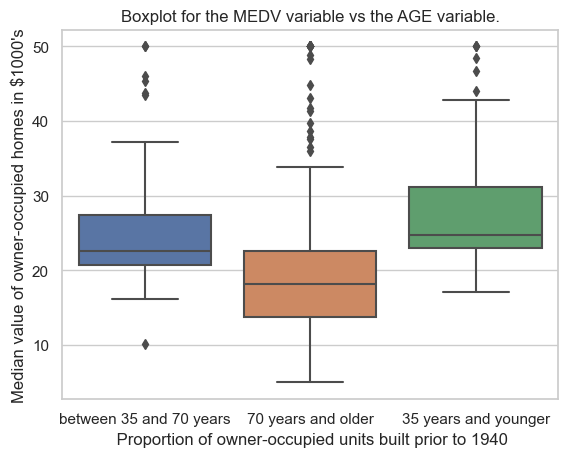

In [3]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
ax.set(xlabel = " Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "Boxplot for the MEDV variable vs the AGE variable.")

[Text(0.5, 0, 'Nitric oxide concentrations '),
 Text(0, 0.5, 'Proportion of non-retail \n business acres per town'),
 Text(0.5, 1.0, 'Scatter Plot: Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')]

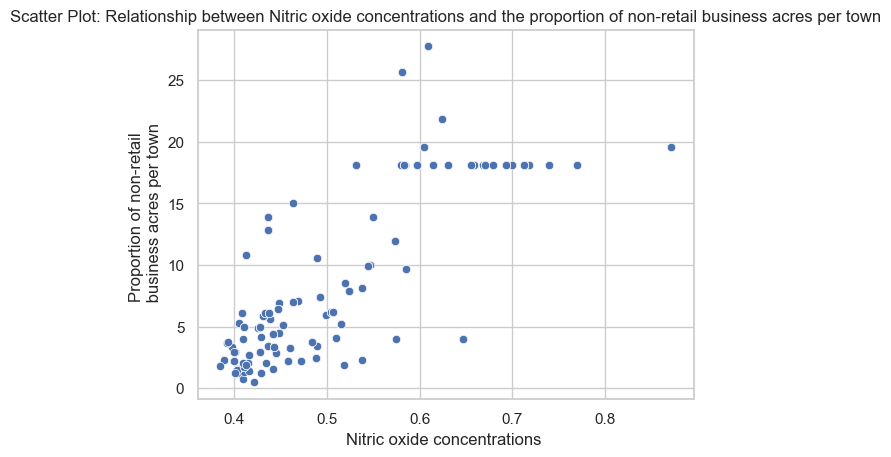

In [4]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set(xlabel = "Nitric oxide concentrations "
           , ylabel = "Proportion of non-retail \n business acres per town"
           , title = "Scatter Plot: Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")

[Text(0.5, 0, 'Pupil to Teacher Ratio Variable'),
 Text(0, 0.5, 'Frequency for \n Pupil to Teacher Ratio Variable '),
 Text(0.5, 1.0, 'Histogram for the Pupil to Teacher Ratio Variable')]

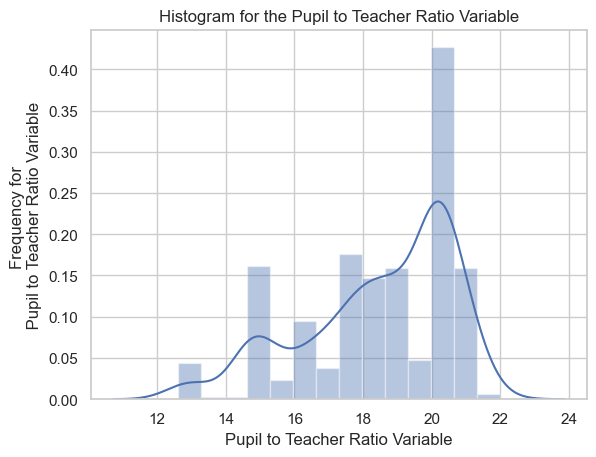

In [5]:
distplot = sns.distplot(boston_df['PTRATIO'])
distplot.set(xlabel = "Pupil to Teacher Ratio Variable"
             ,ylabel = "Frequency for \n Pupil to Teacher Ratio Variable "
            , title = "Histogram for the Pupil to Teacher Ratio Variable")

In [6]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

In [7]:
scipy.stats.ttest_ind(boston_df['MEDV'],boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [8]:
f1=boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
f2=boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
f3=boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
scipy.stats.levene(f1,f2,f3,center ='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [9]:
f_statistic, p_value = scipy.stats.f_oneway(f1,f2,f3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [10]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

In [11]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        22:37:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""